In [2]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import matplotlib.ticker as tkr
import seaborn as sns
import scipy as stats

import nltk # sentiment library
nltk.download('vader_lexicon') # download vader lexicon
from nltk.sentiment import SentimentIntensityAnalyzer as SIA

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     /Users/abealsileshi/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


In [3]:
#provides relative paths for csv as referenced from a folder
import os
for dirname, _, filenames in os.walk('data'): #path to folder
    for filename in filenames:
        print(os.path.join(dirname, filename))

data/Company.csv
data/Company_Tweet.csv
data/Tweet.csv


In [4]:
# read CSV and import tweets
tweets=pd.read_csv('data/Tweet.csv')
company_tweets=pd.read_csv('data/Company_Tweet.csv')
tweets=tweets.merge(company_tweets,how='left',on='tweet_id')

# add time format dates 
tweets['date'] = pd.to_datetime(tweets['post_date'], unit='s').dt.date
tweets.date=pd.to_datetime( tweets.date,errors='coerce')
tweets['time'] = pd.to_datetime(tweets['post_date'], unit='s').dt.time
#1420070457 to 2015-01-01 00:00:57

In [5]:
print("# of data points:", len(tweets))

tweets.head()

# of data points: 4336445


,tweet_id,writer,post_date,body,comment_num,retweet_num,like_num,ticker_symbol,date,time
0,550441509175443456,VisualStockRSRC,1420070457,"lx21 made $10,008 on $AAPL -Check it out! htt...",0,0,1,AAPL,2015-01-01,00:00:57
1,550441672312512512,KeralaGuy77,1420070496,Insanity of today weirdo massive selling. $aap...,0,0,0,AAPL,2015-01-01,00:01:36
2,550441732014223360,DozenStocks,1420070510,S&P100 #Stocks Performance $HD $LOW $SBUX $TGT...,0,0,0,AMZN,2015-01-01,00:01:50
3,550442977802207232,ShowDreamCar,1420070807,$GM $TSLA: Volkswagen Pushes 2014 Record Recal...,0,0,1,TSLA,2015-01-01,00:06:47
4,550443807834402816,i_Know_First,1420071005,Swing Trading: Up To 8.91% Return In 14 Days h...,0,0,1,AAPL,2015-01-01,00:10:05


In [6]:
#break up dataframe into companies

#create unique list of names
companies = tweets.ticker_symbol.unique()


#create a data frame dictionary to store compnay data frames
companyDict = {elem : pd.DataFrame for elem in companies}

for key in companyDict.keys():
    companyDict[key] = tweets[:][tweets.ticker_symbol == key]


In [7]:
#get length of each company dataframe
print(companies)
for company in companies:
    print("Number of", company, "tweets :", len(companyDict[company]))
    
companyDict['AMZN'].head()

['AAPL' 'AMZN' 'TSLA' 'MSFT' 'GOOG' 'GOOGL']
Number of AAPL tweets : 1425013
Number of AMZN tweets : 718715
Number of TSLA tweets : 1096868
Number of MSFT tweets : 375711
Number of GOOG tweets : 392569
Number of GOOGL tweets : 327569


,tweet_id,writer,post_date,body,comment_num,retweet_num,like_num,ticker_symbol,date,time
2,550441732014223360,DozenStocks,1420070510,S&P100 #Stocks Performance $HD $LOW $SBUX $TGT...,0,0,0,AMZN,2015-01-01,00:01:50
27,550447850857828352,JorelLaraKalel,1420071969,Top 10 searched #stocks of #2014 $AAPL $FB $BA...,0,0,2,AMZN,2015-01-01,00:26:09
37,550453172096217088,jakubhajost,1420073237,RT @SeekingAlpha: A Look At BlackBerry's Deals...,0,0,0,AMZN,2015-01-01,00:47:17
38,550453624258965505,WSJ,1420073345,Jeff Bezos lost $7.4 billion in Amazon's worst...,21,139,57,AMZN,2015-01-01,00:49:05
39,550453897714995200,GillesKLEIN,1420073410,Jeff Bezos lost $7.4 billion in #Amazon worst ...,1,2,1,AMZN,2015-01-01,00:50:10


In [8]:
#grab a random tweet from each to use as a test for the sentiment analysis
apple_sample = companyDict['AAPL']['body'].sample()
print(apple_sample.astype(str))
amazon_sample = companyDict['AMZN']['body'][38]
print(amazon_sample)
tesla_sample = companyDict['TSLA'].sample()['body']
print(tesla_sample.astype(str))
microsoft_sample = companyDict['MSFT']['body'].sample()
print(microsoft_sample.astype(str))
google_sample = companyDict['GOOG']['body'].sample()
print(google_sample.astype(str))

1057619    $es_f $nq_f $nasdaq $spx $DAX $FTSE $CAC $qqq ...
Name: body, dtype: object
Jeff Bezos lost $7.4 billion in Amazon's worst year since 2008: http://on.wsj.com/1Acvuo6 $AMZN
1919799    Or you can watch $TSLA run up & then watch tho...
Name: body, dtype: object
2423381    Track curated news and tweets for multiple tic...
Name: body, dtype: object
1447770    #Google is offering $20 Play Store credits to ...
Name: body, dtype: object


In [9]:
# SentimentIntensityAnalyzer is a class. 
# You need to initialize an object of SentimentIntensityAnalyzer and call the polarity_scores() method on that.
sia = SIA()
testSentence = "Tesla revenue ATH buy! all time high! =) cool"
print(amazon_sample)
sia.polarity_scores(amazon_sample)

Jeff Bezos lost $7.4 billion in Amazon's worst year since 2008: http://on.wsj.com/1Acvuo6 $AMZN


{'neg': 0.368, 'neu': 0.632, 'pos': 0.0, 'compound': -0.7506}

In [10]:
# add to lexicon
pos_csv_str='buy,bull,long,support,undervalued,underpriced,cheap,upward,rising,trend,moon,rocket,hold,breakout,call,beat,support,buying,holding,high,profit,ATH,all time high, =),cool,sick,to the moon,check it out!'
neg_csv_str='sell,bear,bubble,bearish,short,overvalued,overbought,overpriced,expensive,downward,falling,sold,low,put,miss,resistance,squeeze,cover,seller,worst,terrible,losing,lost,bad,embarrased'

dictPositive = { i : 4 for i in pos_csv_str.split(",") }
dictNegative = { i : -4 for i in neg_csv_str.split(",") }
add_lexicon = {**dictPositive, **dictNegative}
# print(Financial_Lexicon)

In [11]:
sia.lexicon.update(add_lexicon)
print(amazon_sample)
sia.polarity_scores(amazon_sample)

Jeff Bezos lost $7.4 billion in Amazon's worst year since 2008: http://on.wsj.com/1Acvuo6 $AMZN


{'neg': 0.476, 'neu': 0.524, 'pos': 0.0, 'compound': -0.9001}

In [12]:
#THIS CELL TAKES A LONG TIME TO RUN
#for each company dataset, calculate sentiment for each tweet and label in a new column as sentiment = (positive-negative)
apple_sentiments = []
for tweet in companyDict['AAPL']['body']:
    sentiment = sia.polarity_scores(tweet)
    score = sentiment['pos'] - sentiment['neg']
    apple_sentiments.append(score)
    
companyDict['AAPL']['sentiment'] = apple_sentiments

amazon_sentiments = []
for tweet in companyDict['AMZN']['body']:
    sentiment = sia.polarity_scores(tweet)
    score = sentiment['pos'] - sentiment['neg']
    amazon_sentiments.append(score)
    
companyDict['AMZN']['sentiment'] = amazon_sentiments

tesla_sentiments = []
for tweet in companyDict['TSLA']['body']:
    sentiment = sia.polarity_scores(tweet)
    score = sentiment['pos'] - sentiment['neg']
    tesla_sentiments.append(score)
    
companyDict['TSLA']['sentiment'] = tesla_sentiments

microsoft_sentiments = []
for tweet in companyDict['MSFT']['body']:
    sentiment = sia.polarity_scores(tweet)
    score = sentiment['pos'] - sentiment['neg']
    microsoft_sentiments.append(score)
    
companyDict['MSFT']['sentiment'] = microsoft_sentiments

google_sentiments = []
for tweet in companyDict['GOOG']['body']:
    sentiment = sia.polarity_scores(tweet)
    score = sentiment['pos'] - sentiment['neg']
    google_sentiments.append(score)
    
companyDict['GOOG']['sentiment'] = google_sentiments

<AxesSubplot:title={'center':'Google Sentiment'}, xlabel='date'>

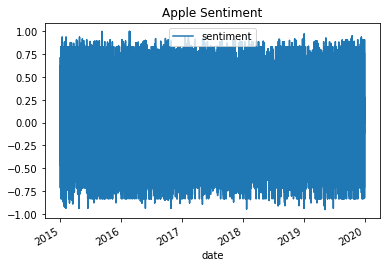

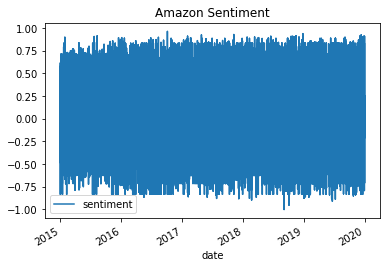

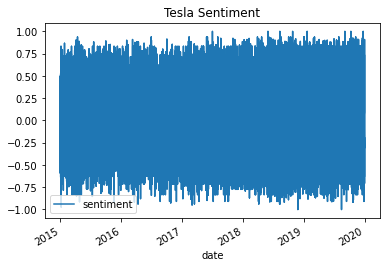

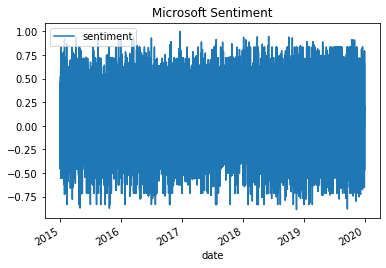

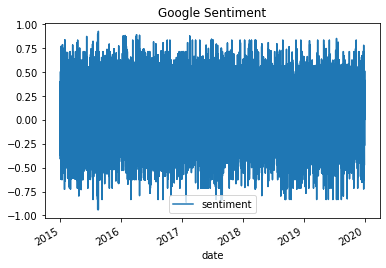

In [13]:
#graph each companies sentiment over time
companyDict['AAPL'].plot(x='date', y='sentiment',title='Apple Sentiment')
companyDict['AMZN'].plot(x='date', y='sentiment',title='Amazon Sentiment')
companyDict['TSLA'].plot(x='date', y='sentiment',title='Tesla Sentiment')
companyDict['MSFT'].plot(x='date', y='sentiment',title='Microsoft Sentiment')
companyDict['GOOG'].plot(x='date', y='sentiment',title='Google Sentiment')


In [18]:
cd ..


/Users/abealsileshi/Desktop/CSCI4802/Data-Science-Team-Project


In [26]:
ls

README.md                Sentiment Analysis/      Stock_Market_Prediction/


In [34]:
cd Stock_Market_Prediction

/Users/abealsileshi/Desktop/CSCI4802/Data-Science-Team-Project/Stock_Market_Prediction


In [35]:
ls #checking the directory

StockPrediction.ipynb        StockPrice_prediction.ipynb


In [36]:
%run StockPrice_prediction.ipynb #running the stockprice prediction notebook to get the variables to show up here

[SUCCESS]


LimitExceededError: (Status 429) (Quandl Error QELx01) You have exceeded the anonymous user limit of 50 calls per day. To make more calls today, please register for a free Quandl account and then include your API key with your requests.

LimitExceededError: (Status 429) (Quandl Error QELx01) You have exceeded the anonymous user limit of 50 calls per day. To make more calls today, please register for a free Quandl account and then include your API key with your requests.

In [37]:
print(lnr_prediction) #seeing that the predictions have in fact come through
print(SVM_prediction)

NameError: name 'lnr_prediction' is not defined

In [1]:
#we have to make the sentiment data have the same length and dimensions in order to run a correlation

g = google_sentiments[:15]
az = amazon_sentiments[:15]
ts = tesla_sentiments[:15]
ap = apple_sentiments[:15]
mic = microsoft_sentiments[:15]

print("SVM x sentiment correlations\n")
r1 = np.corrcoef(g, SVM_prediction) 
print(r1)
r2 = np.corrcoef(az, SVM_prediction)
print(r2)
r3 = np.corrcoef(ap, SVM_prediction)
print(r3)
r4 = np.corrcoef(ts, SVM_prediction)
print(r4)
r5 = np.corrcoef(mic, SVM_prediction)
print(r5)

print("lnr prediction x sentiment correlations\n")
ra = np.corrcoef(g, lnr_prediction) 
print(r1)
rb = np.corrcoef(az, lnr_prediction)
print(r2)
rc = np.corrcoef(ap, lnr_prediction)
print(r3)
rd = np.corrcoef(ts, lnr_prediction)
print(r4)
re = np.corrcoef(mic, lnr_prediction)
print(r5)



NameError: name 'google_sentiments' is not defined